In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# use the data that we do EDA
df = pd.read_csv("root/Dataset/Fraud_sample.csv")

### 5. Preprocessing

In [3]:
df.isna().sum()

step                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
type_CASH_IN           0
type_CASH_OUT          0
type_DEBIT             0
type_PAYMENT           0
type_TRANSFER          0
blacklist_flag_org     0
blacklist_flag_dest    0
dtype: int64

In [4]:
ratio = df['isFraud'].value_counts(normalize=True)
print(ratio)

0    0.991854
1    0.008146
Name: isFraud, dtype: float64


In [5]:
df_new = df.drop(columns = ['step', 'isFlaggedFraud','nameOrig', 'nameDest','isFraud','oldbalanceOrg','oldbalanceDest'], axis = 'columns')

In [6]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,282,464600.35,C469131495,11028.00,0.00,C342883661,35315.32,499915.66,0,0,0.0,0.0,0.0,0.0,1.0,0,0
1,212,2517.63,C1525615562,106528.89,104011.26,M600929596,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
2,235,57789.09,C1551452782,5555.00,0.00,C1662050128,0.00,57789.09,0,0,0.0,1.0,0.0,0.0,0.0,0,0
3,371,7698.26,C1776033547,0.00,0.00,M1370947243,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
4,350,129727.76,C1741301290,10331.00,140058.76,C1909391927,0.00,0.00,0,0,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008208,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008209,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0
1008210,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008211,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0


In [7]:
df_new

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,464600.35,0.00,499915.66,0.0,0.0,0.0,0.0,1.0,0,0
1,2517.63,104011.26,0.00,0.0,0.0,0.0,1.0,0.0,0,0
2,57789.09,0.00,57789.09,0.0,1.0,0.0,0.0,0.0,0,0
3,7698.26,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0,0
4,129727.76,140058.76,0.00,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1008208,339682.13,0.00,339682.13,0.0,1.0,0.0,0.0,0.0,0,0
1008209,6311409.28,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0
1008210,6311409.28,0.00,6379898.11,0.0,1.0,0.0,0.0,0.0,0,0
1008211,850002.52,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0


In [8]:
X = df_new

# Assign selling price as label
y = df["isFraud"]

In [9]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y,random_state = 42, shuffle=True)

In [10]:
y_train.value_counts(normalize=True)

0    0.991854
1    0.008146
Name: isFraud, dtype: float64

In [11]:
y_test.value_counts(normalize=True)

0    0.991857
1    0.008143
Name: isFraud, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale only numeric column
scaler = StandardScaler()
X_train[['amount',  'newbalanceOrig', 'newbalanceDest']] = scaler.fit_transform(X_train[['amount',  'newbalanceOrig', 'newbalanceDest']])
X_test[['amount',  'newbalanceOrig', 'newbalanceDest']]  = scaler.transform(X_test[['amount',  'newbalanceOrig', 'newbalanceDest']])


In [ ]:
# save the scaler value for using on app
import pickle

pickle.dump(scaler, open('root/scaler.pkl', 'wb'))

In [ ]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "noppawee"
#mlflow.create_experiment(name="noppawee-ML-project-macro")  #create if you haven't create
mlflow.set_experiment(experiment_name="noppawee-ML-project-final")

<Experiment: artifact_location='mlflow-artifacts:/154179598935460032', creation_time=1701072492887, experiment_id='154179598935460032', last_update_time=1701072492887, lifecycle_stage='active', name='noppawee-ML-project-final', tags={}>

In [ ]:
X_train

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
975876,3.779314,-0.291605,0.976150,0.0,0.0,0.0,0.0,1.0,0,0
801687,-0.289268,-0.291605,-0.332946,0.0,0.0,0.0,1.0,0.0,0,0
718506,-0.202080,-0.291605,-0.261923,0.0,1.0,0.0,0.0,0.0,0,0
799730,-0.264350,0.310204,0.028501,1.0,0.0,0.0,0.0,0.0,0,0
593304,-0.284227,-0.251804,-0.332946,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
939163,-0.265843,-0.150587,-0.332946,0.0,0.0,0.0,1.0,0.0,0,0
749364,-0.009966,-0.291605,-0.097314,0.0,1.0,0.0,0.0,0.0,0,0
58220,-0.187638,-0.288115,-0.332946,0.0,0.0,0.0,1.0,0.0,0,0
742080,0.039590,-0.291605,0.011097,0.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
# Model with imbalance class
##Baselines
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
import xgboost as xgb

#model
lr = LogisticRegression(solver = 'liblinear',random_state=999)
rf = RandomForestClassifier(random_state=999)
gnb = GaussianNB()
xgbr = xgb.XGBClassifier(random_state = 999, learning_rate = 0.1)
models = [lr,gnb, rf,xgbr]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    if model == lr:
        mlflow.start_run(run_name="Logistic Regression")
        mlflow.log_params(params={"model":"Logistic Regression"})
    elif model == rf:
        mlflow.start_run(run_name="Random Forest")
        mlflow.log_params(params={"model":"Random Forest"})
    elif model == gnb:
        mlflow.start_run(run_name="Naive Bayesian - Gaussian")
        mlflow.log_params(params={"model":"Naive Bayesian - Gaussian"})
    elif model == xgbr:
        mlflow.start_run(run_name="XGboost")
        mlflow.log_params(params={"model":"XGboost"})
    
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  #f1, recall, precision, accuracy
    print("model: ", model,"f1 Scores: ", score, "- mocro f1 Scores mean: ", score.mean(), "- macro f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    mlflow.log_metric(key="macro_f1_score_mean", value=score.mean())
    mlflow.log_metric(key="macro_f1_score_std", value=score.std())
    
    model.fit(X_train, y_train)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

    mlflow.end_run()


model:  LogisticRegression(random_state=999, solver='liblinear') f1 Scores:  [0.60455061 0.61403866 0.59712484 0.61549583 0.60572345] - mocro f1 Scores mean:  0.6073866780087396 - macro f1 Scores std (lower better):  0.0067249109808288155
model:  GaussianNB() f1 Scores:  [0.37972282 0.37897981 0.37873948 0.37817441 0.38011421] - mocro f1 Scores mean:  0.3791461472820581 - macro f1 Scores std (lower better):  0.0006938301322714928
model:  RandomForestClassifier(random_state=999) f1 Scores:  [0.87092273 0.87171548 0.86504952 0.87072576 0.87260823] - mocro f1 Scores mean:  0.8702043445264115 - macro f1 Scores std (lower better):  0.002661665953727863
model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_typ

In [ ]:
# Model with imbalance class
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model
gb = GradientBoostingClassifier(random_state=999)
ada = AdaBoostClassifier(random_state=999)
models = [gb,ada]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    if model == gb:
        mlflow.start_run(run_name="Gradient Boosting")
        mlflow.log_params(params={"model":"Gradient Boosting"})
    elif model == ada:
        mlflow.start_run(run_name="AdaBoost")
        mlflow.log_params(params={"model":"AdaBoost"})
    
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  #f1, recall, precision, accuracy
    print("model: ", model,"f1 Scores: ", score, "- mocro f1 Scores mean: ", score.mean(), "- macro f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    mlflow.log_metric(key="macro_f1_score_mean", value=score.mean())
    mlflow.log_metric(key="macro_f1_score_std", value=score.std())
    
    model.fit(X_train, y_train)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

    mlflow.end_run()


model:  GradientBoostingClassifier(random_state=999) f1 Scores:  [0.89826901 0.89593093 0.88997402 0.89048401 0.89137846] - mocro f1 Scores mean:  0.893207285365861 - macro f1 Scores std (lower better):  0.003294057111724673
model:  AdaBoostClassifier(random_state=999) f1 Scores:  [0.69357869 0.69579724 0.68694059 0.69616082 0.69814959] - mocro f1 Scores mean:  0.6941253848428054 - macro f1 Scores std (lower better):  0.0038743365829028804


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import xgboost as xgb

xgbr = xgb.XGBClassifier(random_state=999)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [6,8,10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='f1_macro', cv=3, verbose=1)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Get the best model
best_xgb = grid.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
f1 score: 0.7882689556509299


In [ ]:
filename = '/root/best_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
adfgaga

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100001
           1       0.95      0.67      0.79       821

    accuracy                           1.00    100822
   macro avg       0.98      0.84      0.89    100822
weighted avg       1.00      1.00      1.00    100822



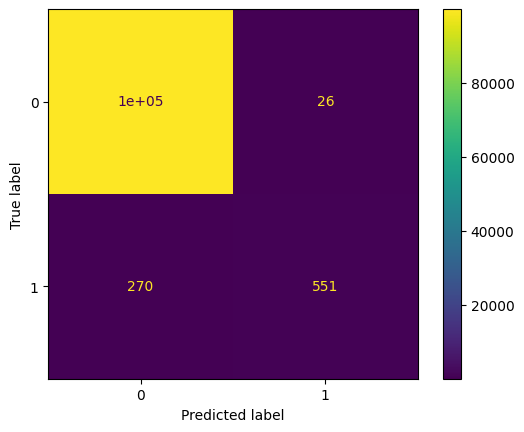

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load a model from MLflow
# model = mlflow.pyfunc.load_model('runs:/c6bc8c4d55c944b189531410b2da772f/model/')
ypred = grid.predict(X_test)

# print classification report
print(classification_report(y_test, ypred))

#display confusion matrix
cm = confusion_matrix(y_test, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()
